# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

### In this part we will get to know more about the datset we are using for analysis and how can we make it better.

lets start by importing the libraries and data that we need to work on.


In [81]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [3]:
Raw_data=pd.read_csv(r'C:\Users\gopis\Desktop\DAML\Projects\ML\Week-1\ecommerce_data.csv',encoding="ISO-8859-1")
print(Raw_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


As we have the data with us,we need to check what the data contains(colums,summary...)

In [5]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
Raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


As we explored the dataset,check for any missing data in the data and fill the missing values with appropriate values.

In [8]:
Raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As we can see there are missing values in colum description(1454 missing values) and in CustomerID(135080 missing values).
So we have to replace the missing values with mean(avg) for numerical colums and mode(most frequent values) for non numerical values.

In [10]:
Raw_data.fillna(Raw_data.mean(numeric_only=True),inplace=True)
Raw_data.fillna(Raw_data.mode().iloc[0],inplace=True)

In [11]:
Raw_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

now the data doesn't have any missing values but we still have negative values in quantity.so now lets drop the rows that negative values in quantity and also let check for any duplicate values

In [15]:
Raw_data[Raw_data.Quantity < 1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [18]:
Raw_data.drop(Raw_data.index[Raw_data.Quantity < 1],inplace=True)
Raw_data[Raw_data.Quantity < 1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


The data has undesirable format for invoicedate so lets chnage it to desirable format and make all strings capitals for colum like country

In [31]:
Raw_data['InvoiceDate']=pd.to_datetime(Raw_data['InvoiceDate'], format='%m/%d/%Y %H:%M')
Raw_data['InvoiceNo']=Raw_data['InvoiceNo'].astype(str)
Raw_data['Country'] = Raw_data['Country'].str.upper()
Raw_data['StockCode'] = Raw_data['StockCode'].astype(str).str.upper()

Raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM


In [33]:
Raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,531285.000000
mean,10.655262,3.857296,15292.652290
std,156.830323,41.810047,1482.645751
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14388.000000
50%,3.000000,2.080000,15287.690570
75%,10.000000,4.130000,16261.000000
max,80995.000000,13541.330000,18287.000000


Now its time to check for any outliers and remove the outliers

In [41]:
Raw_data = Raw_data[(np.abs(sp.stats.zscore(Raw_data['UnitPrice']))<3) & (np.abs(sp.stats.zscore(Raw_data['Quantity']))<5)]
Raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,518937.000000,518937.000000,518937.000000
mean,8.272694,3.014837,15298.315988
std,13.599449,2.742760,1483.812410
min,1.000000,0.000000,12347.000000
25%,1.000000,1.250000,14388.000000
50%,4.000000,2.080000,15287.690570
75%,10.000000,4.130000,16284.000000
max,143.000000,15.950000,18287.000000


Adding fields that we need for futher analysis

In [51]:
Raw_data['TotalPrice']=Raw_data['Quantity']*Raw_data['UnitPrice']

In [52]:
Raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FinalPrice,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,20.34


In [54]:
Raw_data.drop('FinalPrice',axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,FRANCE,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,FRANCE,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE,16.60


Lets check some corelation between features



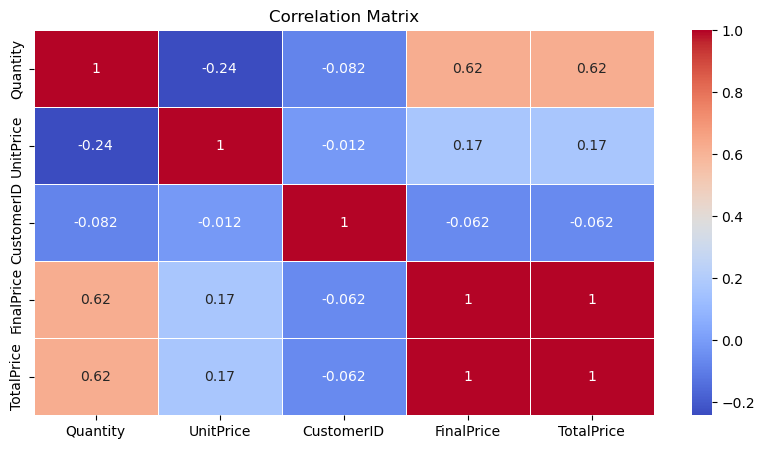

In [92]:
plt.figure(figsize=(10, 5))
sns.heatmap(Raw_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Save the cleaned file for other tasks that we need to do

In [104]:
Raw_data.to_csv(r'C:\Users\gopis\Desktop\DAML\Projects\ML\Week-1\Cleaned_data.csv', date_format = '%Y-%m-%d %H:%M', index = False)

**Analysis**

In [73]:
#Relation between customer and total price

customer_analysis = Raw_data.groupby(['CustomerID', 'Country'])['TotalPrice'].sum().reset_index()
# Plotting Top 10 Customers
fig = px.scatter(
    customer_analysis.head(10), 
    x='CustomerID', 
    y='TotalPrice', 
    color='Country',
    title='Top 10 Customers by Total Sales'
)
fig.show()


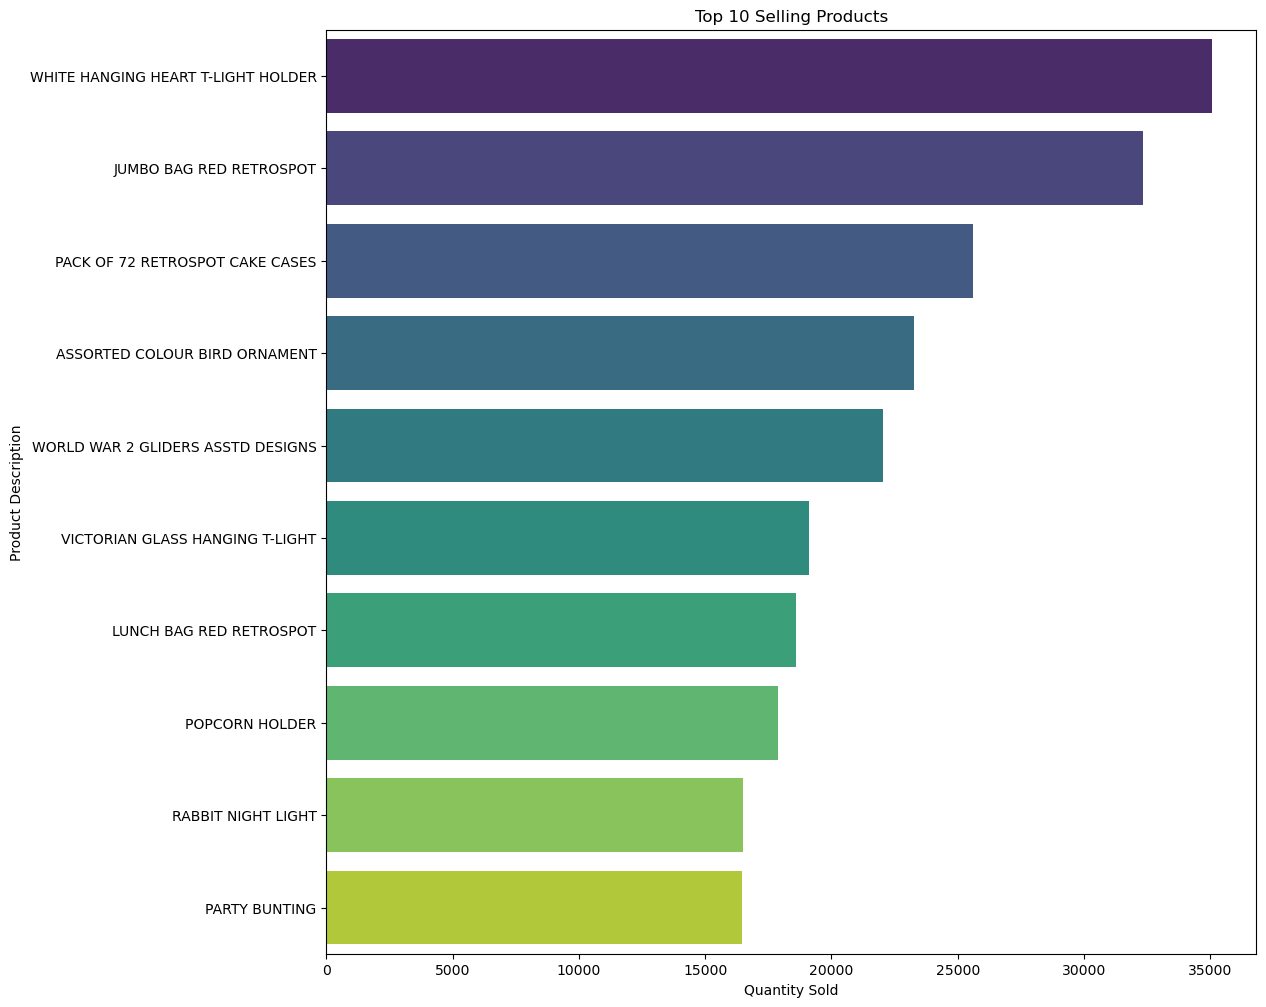

In [93]:
#Top selling product
top_products = Raw_data.groupby('Description')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Plotting Top Selling Products
plt.figure(figsize=(12, 12))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [89]:
country_sales = Raw_data.groupby('Country')['TotalPrice'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalPrice', ascending=False).head(10)

# Plotting Sales by Country
fig = px.bar(
    country_sales, 
    x='Country', 
    y='TotalPrice', 
    color='Country',
    title='Top 10 Countries by Total Sales'
)
fig.show()